In [3]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader

from itertools import cycle
from tqdm.auto import trange

from matplotlib import cm
import matplotlib.pyplot as plt

from utils import plot_utils, s3w_utils, vmf_utils, utils
from utils.nf_utils import normalizing_flows
from methods import s3w, ssw, sw

from experiments import nf_learning_sampling

from scipy.stats import gaussian_kde

device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

## Acknowledgement: Adapted from Bonet et al. 2023 (https://github.com/clbonet/spherical_sliced-wasserstein)

In [20]:
mu_target = [0, 1, 0]
mu_target = mu_target / np.linalg.norm(mu_target)
kappa_target = 10
X_target = torch.tensor(vmf_utils.rand_vmf(mu_target, kappa=kappa_target, N=1000), dtype=torch.float)

X0 = torch.randn((500, 3), device=device)
X0 = F.normalize(X0, p=2, dim=-1)

model = normalizing_flows.make_NF(d=3, n_blocks=6, n_components=5, device=device)

d_func = s3w.s3wd
d_args = {'n_projs': 1000, 'device': device, 'p': 2}

L, L_loss, snapshots = nf_learning_sampling.run_exp(X_target, X0, model, d_func, d_args, device=device, n_steps=2000,lr=1e-1, batch_size=500, snapshot_t=[0,500,1000,1500,1999])

100%|████████████████████████████████████████████████████| 2000/2000 [00:42<00:00, 47.35it/s, Loss = 2.731]


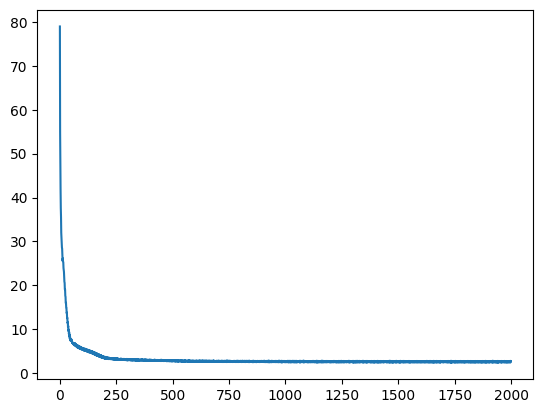

In [21]:
plt.plot(L_loss)
plt.show()

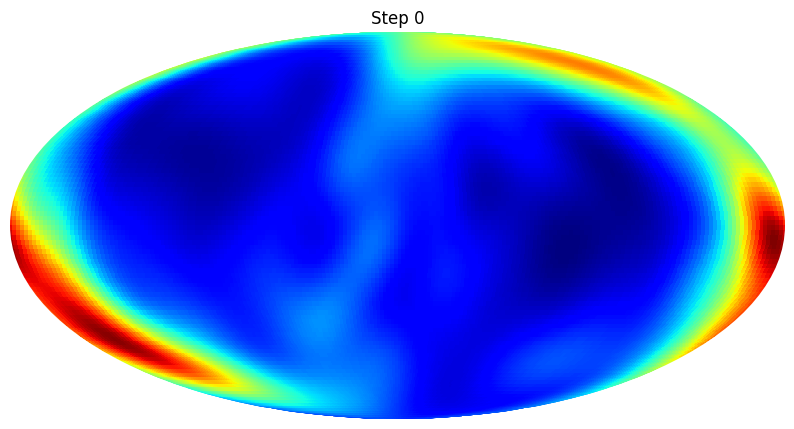

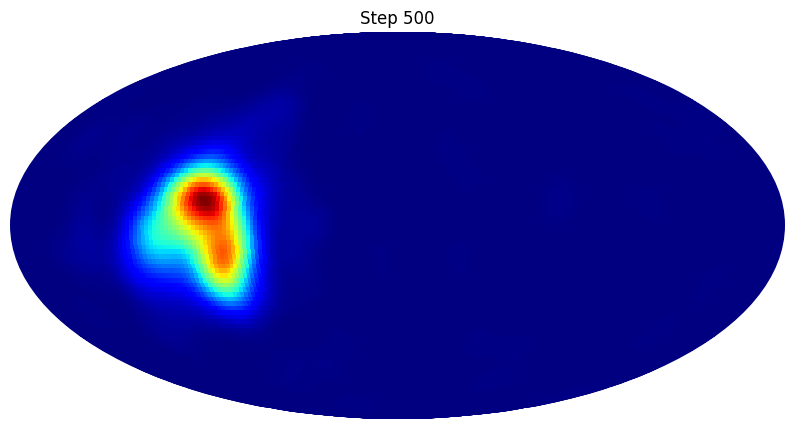

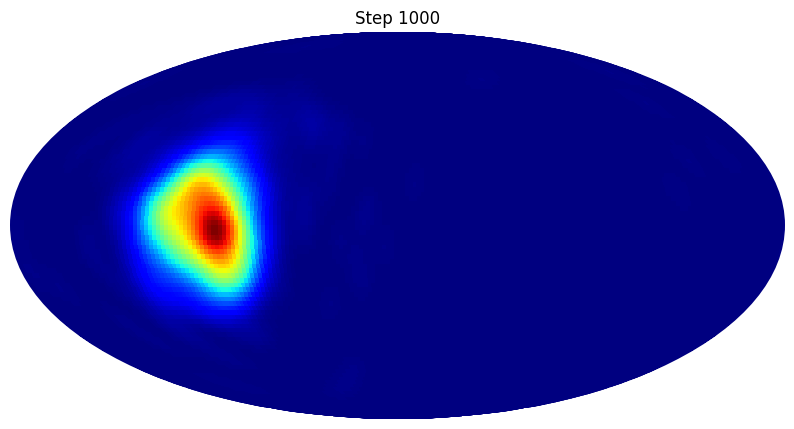

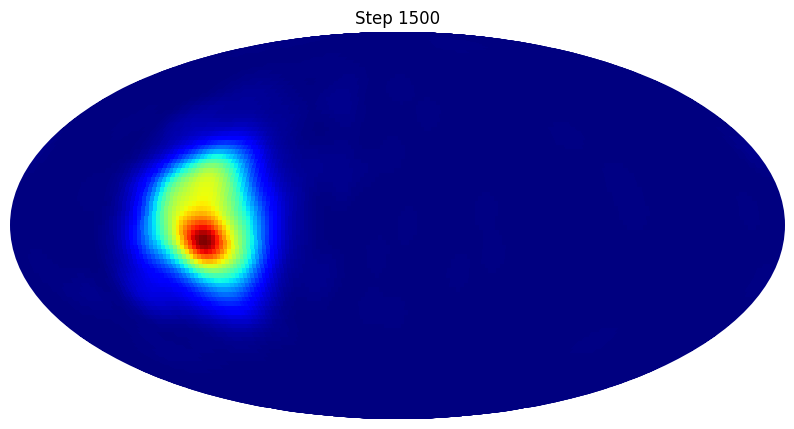

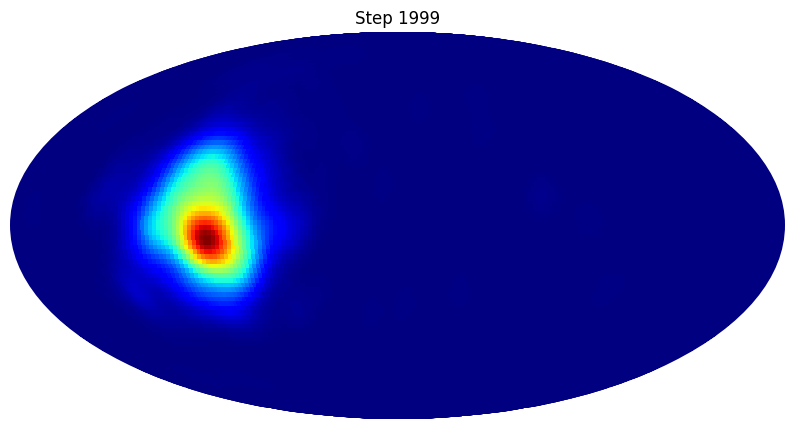

In [19]:
for step, output in snapshots.items():
    kernel = gaussian_kde(output.T)

    def density_function(x):
        return kernel.pdf(x.T)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': "mollweide"})
    plot_utils.projection_mollweide(density_function, ax)
    ax.set_title(f"Step {step}")
    plt.show()

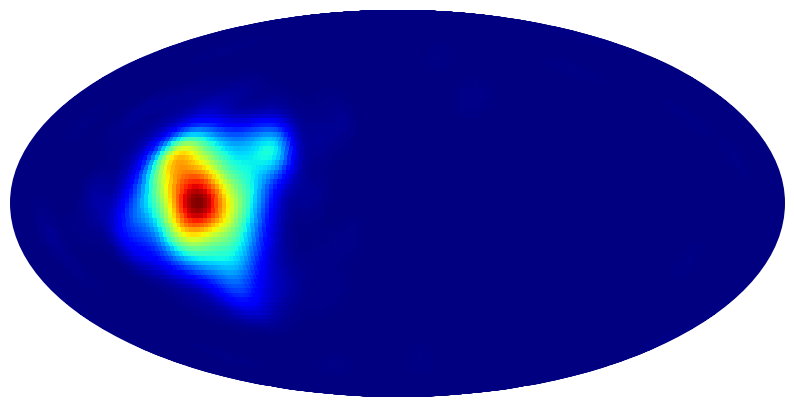

In [8]:
noise = F.normalize(torch.randn((1000,3), device=device), p=2, dim=-1)
z0, _ = model(noise)

kernel = gaussian_kde(z0[-1].T.detach().cpu())

fig, ax = plt.subplots(1, 1, figsize=(10,10), subplot_kw={'projection': "mollweide"})
plot_utils.projection_mollweide(lambda x: kernel.pdf(x.T), ax)
plt.show()

In [22]:
model = normalizing_flows.make_NF(d=3, n_blocks=6, n_components=5, device=device)

d_func = ssw.sswd
d_args = {'num_projections': 1000, 'device': device, 'p': 2}

L, L_loss, snapshots = nf_learning_sampling.run_exp(X_target, X0, model, d_func, d_args, device=device, n_steps=2000,lr=1e-1, batch_size=500, snapshot_t=[0,500,1000,1500,1999])

100%|████████████████████████████████████████████████████| 2000/2000 [03:38<00:00,  9.14it/s, Loss = 0.000]


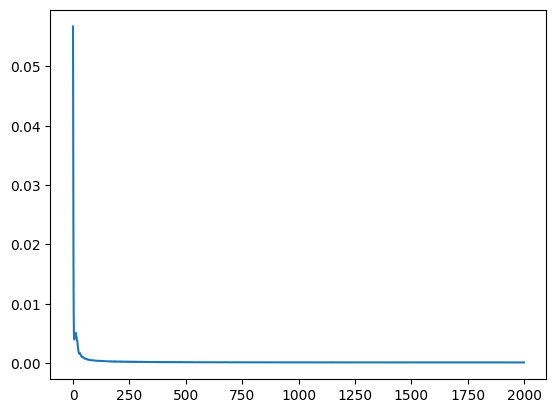

In [23]:
plt.plot(L_loss)
plt.show()

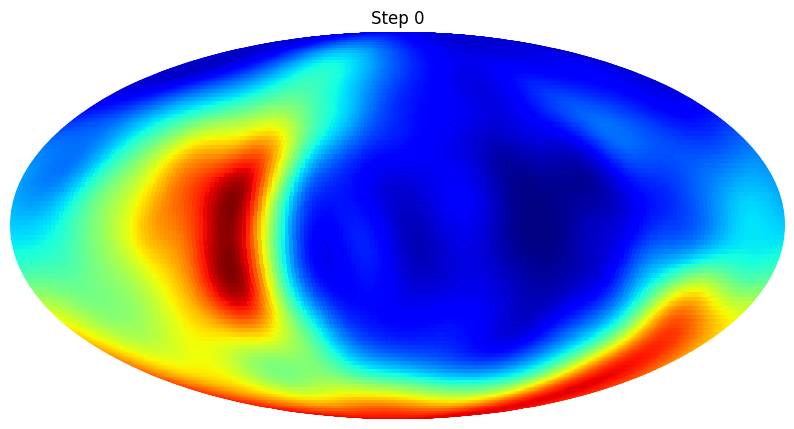

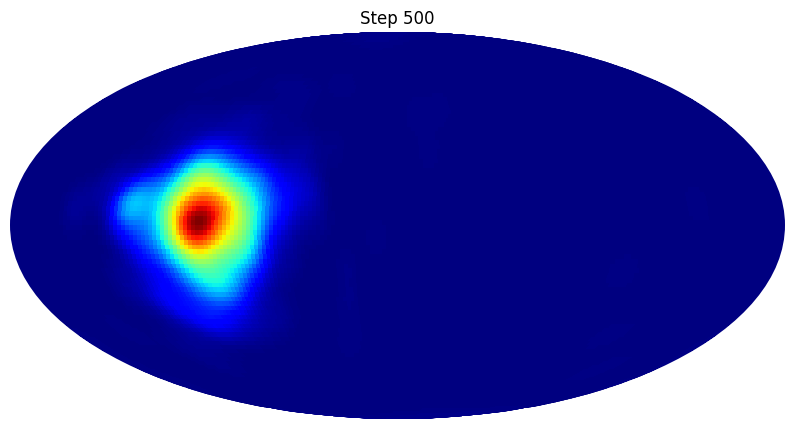

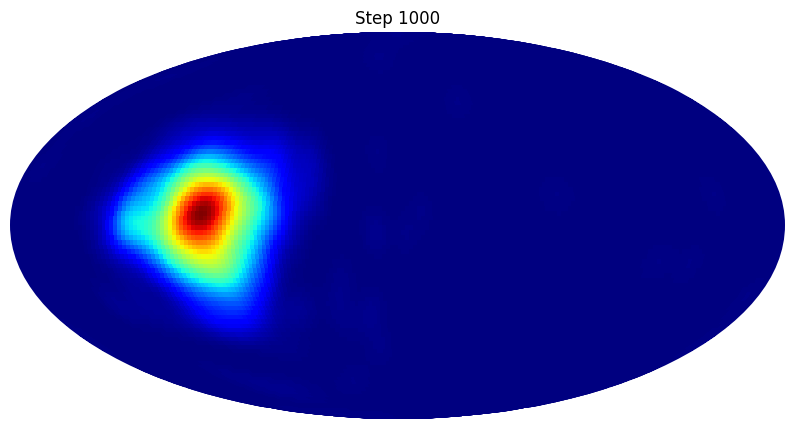

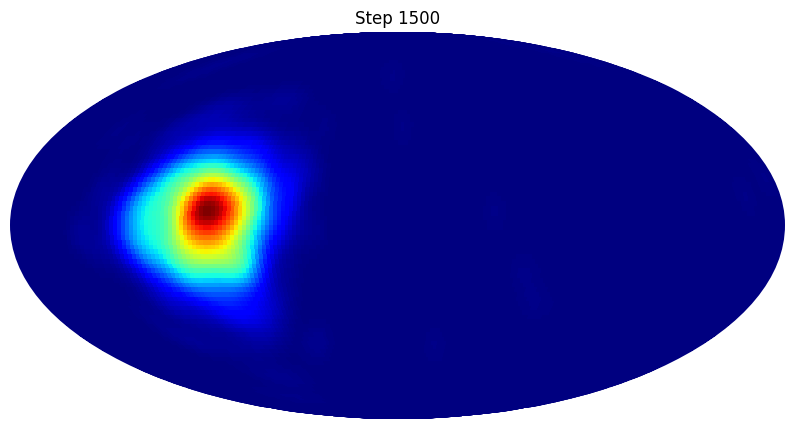

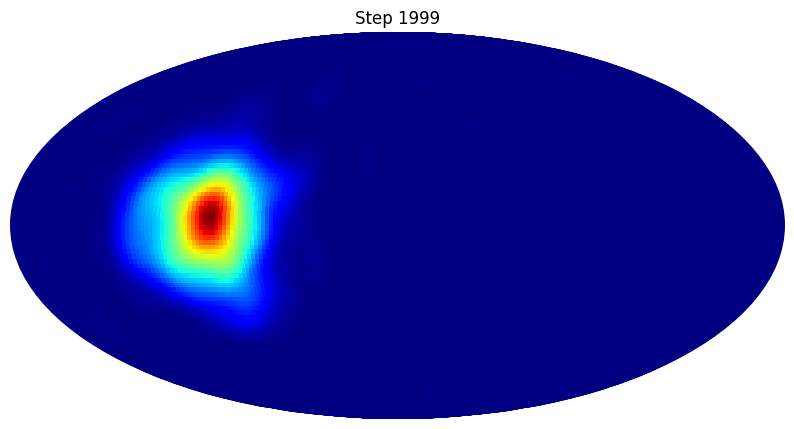

In [24]:
for step, output in snapshots.items():
    kernel = gaussian_kde(output.T)

    def density_function(x):
        return kernel.pdf(x.T)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': "mollweide"})
    plot_utils.projection_mollweide(density_function, ax)
    ax.set_title(f"Step {step}")
    plt.show()